In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from PIL import Image
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
from dataset import *

In [5]:
# Define a custom dataset class
class CorrectionImageDataset(Dataset):
    def __init__(self, root_dir, transform=None, file_list=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_list = os.listdir(root_dir)

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.file_list[idx])
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image


In [6]:
# Define a custom dataset class
class CorrectionImageDataset2(Dataset):
    def __init__(self, file_list, transform=None, ):
        self.transform = transform
        self.file_list = file_list

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = self.file_list[idx]
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image


In [9]:
import glob
import albumentations as A 

In [10]:
input_images = glob.glob('data/training/INPUT_IMAGES/*P1.5.JPG')

In [99]:
train_dataset = CorrectionImageDataset('data/training/GT_IMAGES')
validation_dataset = CorrectionImageDataset('data/validation/GT_IMAGES')

# test set must be done with the same data 

In [69]:
train_dataset = CorrectionImageDataset2(input_images)
validation_dataset = CorrectionImageDataset2(input_images) # WATCH OUT


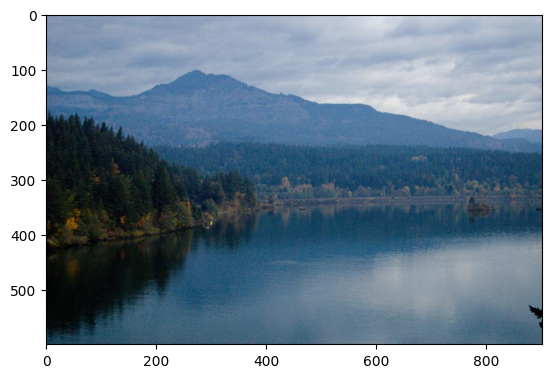

In [166]:
image = np.array(train_dataset.__getitem__(40))
plt.imshow(image)

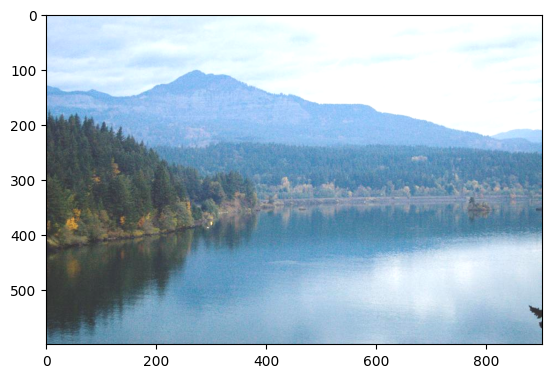

In [167]:
transform = A.RandomBrightnessContrast(p=1, brightness_limit=(0.2,0.2), contrast_limit=(0.2, 0.2))
augmented_image = transform(image=image)['image']
plt.imshow(augmented_image)


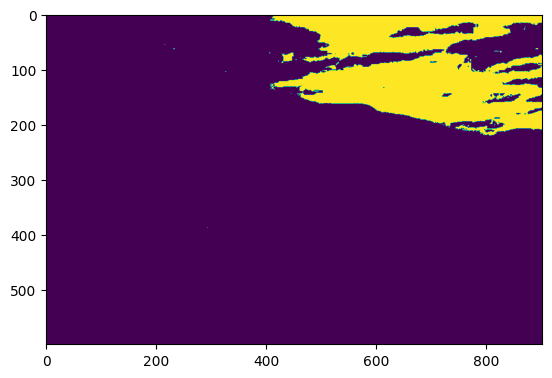

In [168]:
mask = augmented_image.mean(axis=2) == 255
plt.imshow(mask)

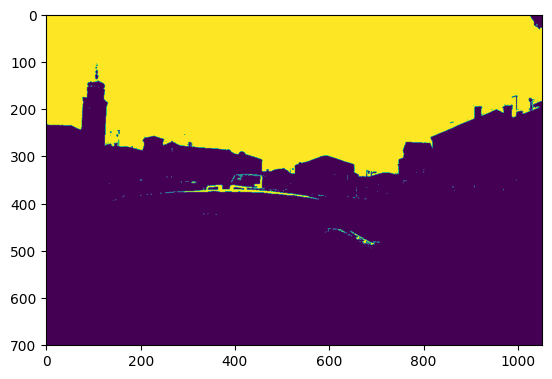

In [37]:
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
    return img

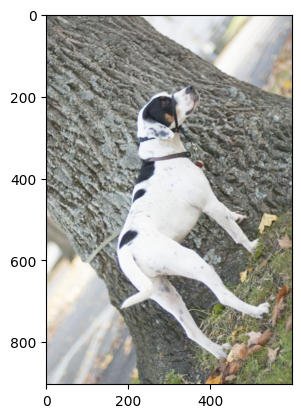

In [72]:
plt.imshow(x)

In [73]:
p = increase_brightness(x, 100)

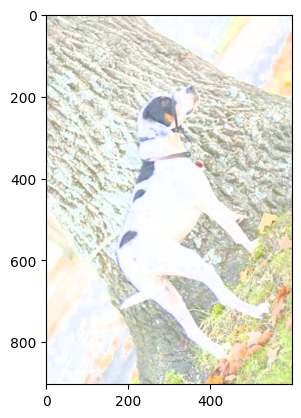

In [74]:
plt.imshow(p)

In [155]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
#	return cv2.LUT(image, table)
    return 

In [227]:
xt = adjust_gamma(x, gamma=20) 

In [228]:
cv2.convertScaleAbs(x, alpha, beta)

NameError: name 'alpha' is not defined

In [145]:
a = 200
xc = np.clip(x+a, 0, 255 ).astype('int32')

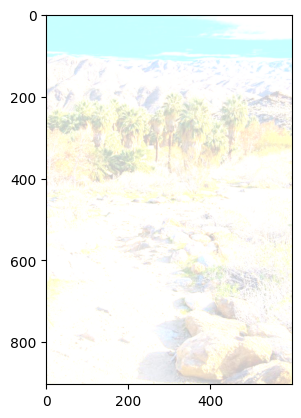

In [147]:
plt.imshow(xc)

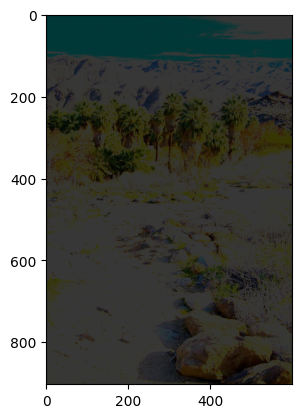

In [148]:
plt.imshow(xc200)